Mounted at /content/gdrive


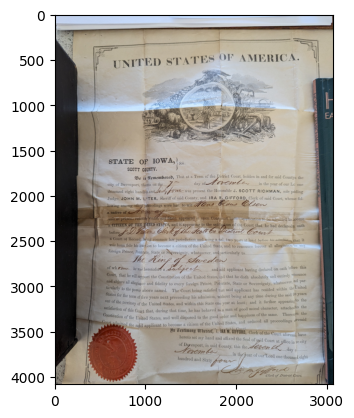

In [1]:
from google.colab import drive
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Mount your Google Drive
drive.mount('/content/gdrive')

# Set the path to your image file on the shared drive
image_path = '/content/gdrive/MyDrive/ha-image/original_image_full.jpg'

img = mpimg.imread(image_path)

plt.imshow(img)

In [4]:
image_path = '/content/gdrive/MyDrive/AIM/citizen_1864_rescan.jpg'
preds_path = '/content/gdrive/MyDrive/AIM/citizen_1864_xform0_carlv_bbox.pkl'
font_path = '/content/gdrive/MyDrive/AIM/OpenSans-Regular.ttf'
overlay_image_pathA = '/content/gdrive/MyDrive/AIM/overlay_image_A.jpg'
overlay_image_pathB = '/content/gdrive/MyDrive/AIM/overlay_image_textsized.jpg'

      word         UL_X        UL_Y         LL_X        LL_Y         LR_X  \
0        c    75.703125   39.843750   111.562500   39.843750   111.562500   
1   united   628.225586  214.346313  1150.899780  204.390610  1152.918457   
2   states  1207.265625  219.140625  1741.171875  219.140625  1741.171875   
3  america  2018.740723  227.915924  2668.840332  216.306961  2670.604736   
4       of  1785.000000  223.125000  1956.328125  223.125000  1956.328125   

         LR_Y         UR_X        UR_Y  
0   91.640625    75.703125   91.640625  
1  310.374451   630.244263  320.330170  
2  318.750000  1207.265625  318.750000  
3  315.102203  2020.504883  326.711151  
4  322.734375  1785.000000  322.734375  
Remaining list of words:
['united', 'states', 'america', 'ralling', 'luere', 'iowa', 'state', 'sss', 'cunty', 'scott', 'that', 'term', 'the', 'district', 'and', 'for', 'renteutbeted', 'court', 'holden', 'said', 'county', 'the', 'ovcm', 'elc', 'day', 'the', 'the', 'lord', 'davenport', 'theei

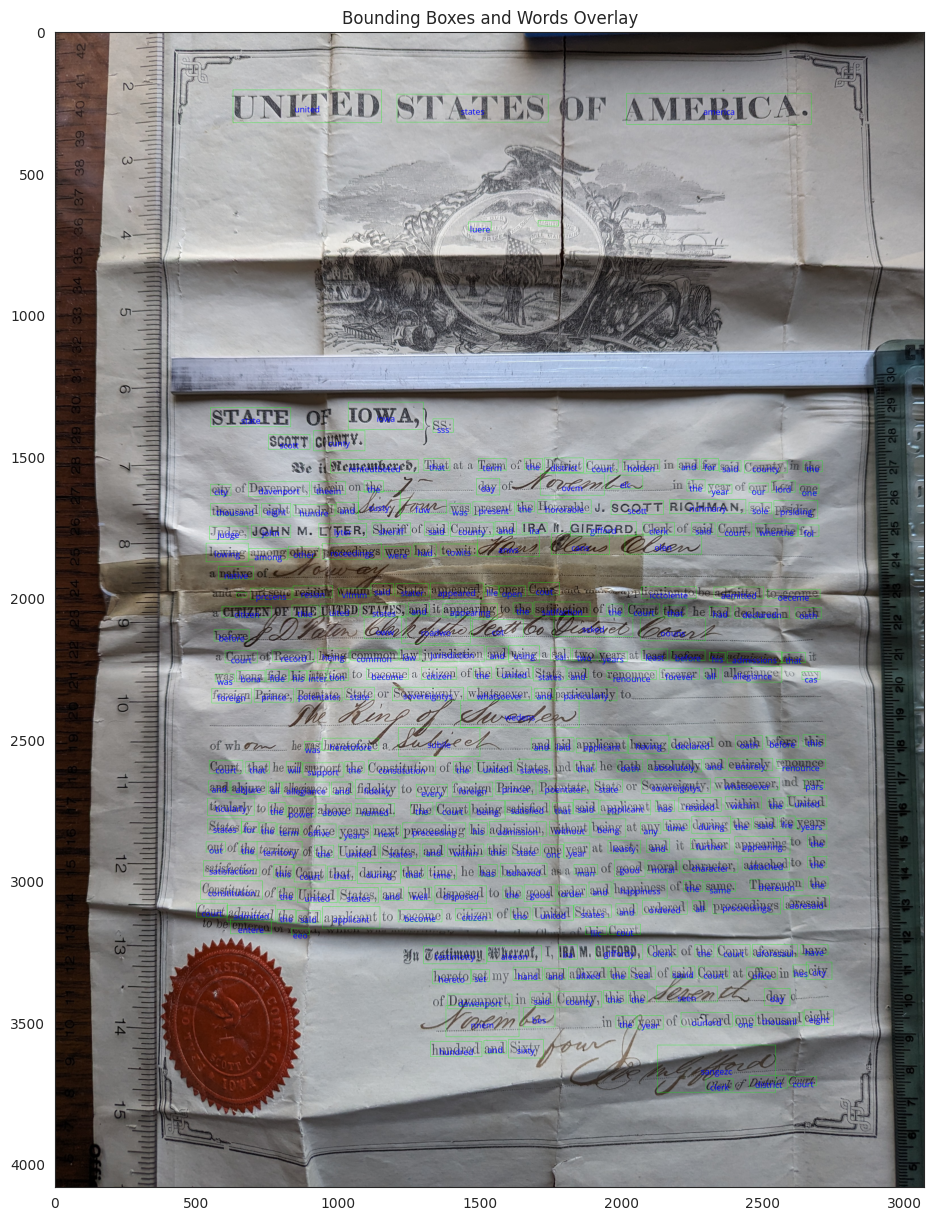

Count of bounding box/word overlays: 332


In [9]:
# Model B
import pickle
import pandas as pd
import numpy as np
from PIL import Image, ImageDraw, ImageFont
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Load the pickle file
with open(preds_path, 'rb') as f:
    preds_df = pickle.load(f)
print(preds_df.head())

# Convert the data to a pandas DataFrame
#preds_df = pd.DataFrame(preds, columns=['word', 'upper_left_X', 'upper_left_Y', 'lower_left_X', 'lower_left_Y', 'lower_right_X', 'lower_right_Y', 'upper_right_X', 'upper_right_Y'])

# Filter words with less than 3 characters
preds_df = preds_df[preds_df.word.str.len() >= 3]

print("Remaining list of words:")
print(preds_df.word.tolist())

# Load the image using PIL
img = Image.open(image_path)

# Create a new copy of the image for overlay
overlay = img.copy()

# Set the font and size for the text overlay
font = ImageFont.truetype(font_path, 30)

fig, (ax1) = plt.subplots(1, 1, figsize=(15, 15))
ax1.set_title("Bounding Boxes and Words Overlay")
sns.set_style("white")

count_overlays = 0

# Iterate over the rows of the DataFrame
for idx, row in preds_df.iterrows():
    # Extract the bounding box coordinates and word
    x1, y1, text = row['UL_X'], row['UL_Y'], row['word']
    x2, y2 = row['LL_X'], row['LL_Y']
    x3, y3 = row['LR_X'], row['LR_Y']
    x4, y4 = row['UR_X'], row['UR_Y']

    # Calculate the bounding box rectangle to draw.
    min_x, min_y = min(x1, x2, x3, x4), min(y1, y2, y3, y4)
    max_x, max_y = max(x1, x2, x3, x4), max(y1, y2, y3, y4)

    draw = ImageDraw.Draw(overlay)
    draw.rectangle((min_x, min_y, max_x, max_y), outline=(0, 255, 0))

    # Get the text bounding box to ensure it fits inside the rectangle
    text_bbox = draw.textbbox((min_x, min_y), text, font=font)
    text_width, text_height = text_bbox[2] - text_bbox[0], text_bbox[3] - text_bbox[1]

    # Adjust the text position to center it within the bounding box
    if max_x - min_x > text_width and max_y - min_y > text_height:
        text_x = min_x + ((max_x - min_x) / 2) - (text_width / 2)
        text_y = min_y + ((max_y - min_y) / 2) - (text_height / 2)
        draw.text((text_x, text_y), text, (0, 0, 255), font=font)
        count_overlays += 1

# Display the imaged with the overlays
ax1.imshow(overlay)
plt.show()

print(f"Count of bounding box/word overlays: {count_overlays}")
overlay.save(overlay_image_pathB)

In [10]:
from google.colab import files
files.download(overlay_image_pathB)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Bounding Box Distribution**

Mean Height: 0.81
Standard Deviation of Height: 6.79
Mean Width: 127.63
Standard Deviation of Width: 71.74


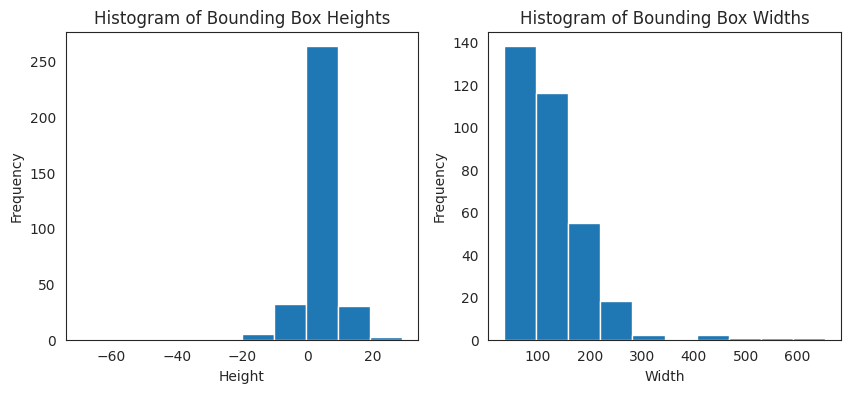

In [13]:
# model A
# Collect heights and widths
heights = []
widths = []
for idx, row in preds_df.iterrows():
    # Extract the bounding box coordinates and word
    lr_y, ul_y, lr_x,  ul_x, word = row['LL_Y'], row['UL_Y'], row['LR_X'], row['UL_X'], row['word']

    heights.append(lr_y - ul_y)
    widths.append(lr_x - ul_x)

# Calculate mean, standard deviation
mean_height = np.mean(heights)
std_height = np.std(heights)
mean_width = np.mean(widths)
std_width = np.std(widths)

print(f"Mean Height: {mean_height:.2f}")
print(f"Standard Deviation of Height: {std_height:.2f}")
print(f"Mean Width: {mean_width:.2f}")
print(f"Standard Deviation of Width: {std_width:.2f}")

# Plot histograms
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.hist(heights)
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.title('Histogram of Bounding Box Heights')

plt.subplot(1, 2, 2)
plt.hist(widths)
plt.xlabel('Width')
plt.ylabel('Frequency')
plt.title('Histogram of Bounding Box Widths')

plt.show()